In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv("/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


About this dataset
- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type


1. Value 1: typical angina 
2. Value 2: atypical angina 
3. Value 3: non-anginal pain 
4. Value 4: asymptomatic

- trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results


1. Value 0: normal
2. Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
3. Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved
  
- target : 0= less chance of heart attack 1= more chance of heart attack

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

**No Null Value**

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

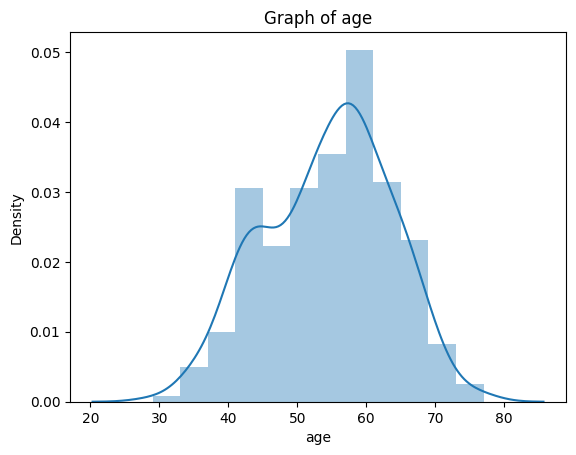

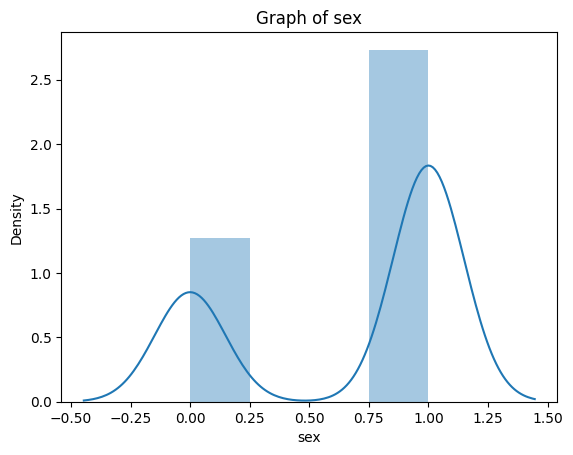

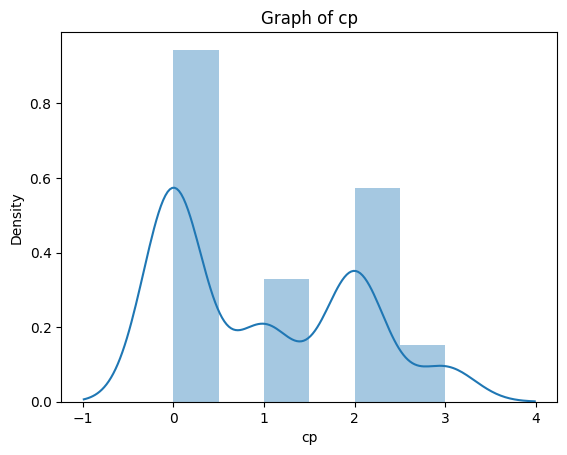

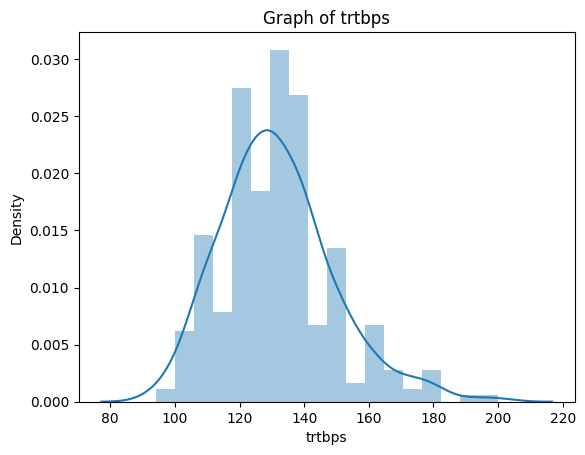

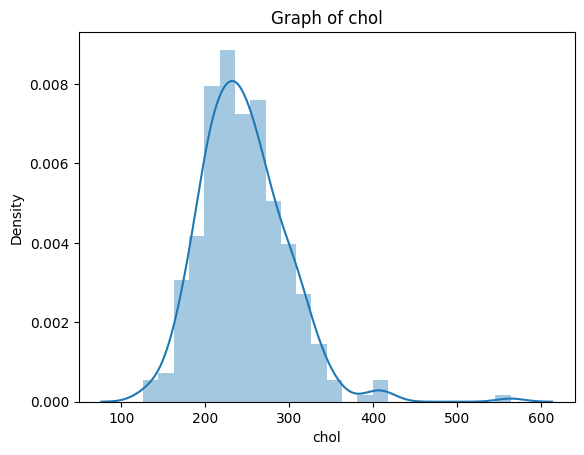

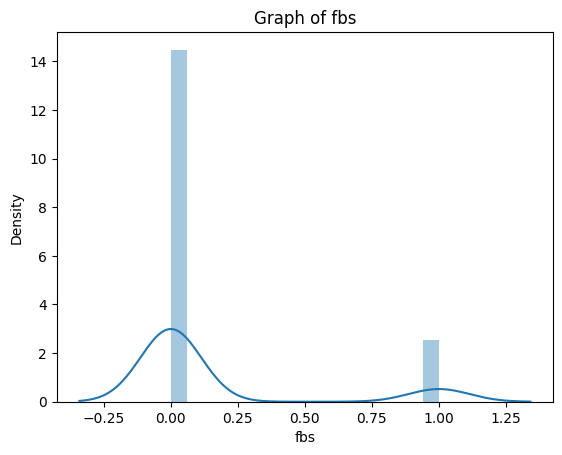

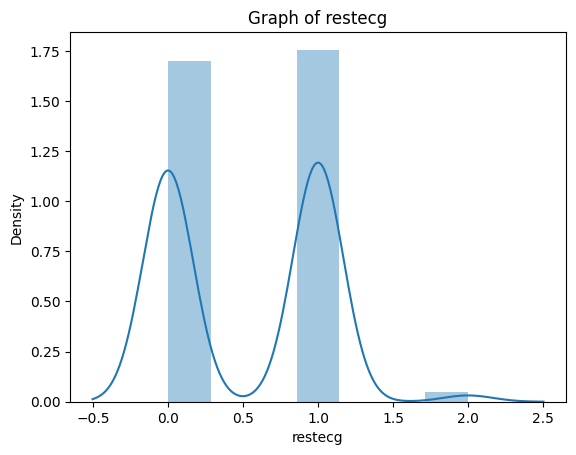

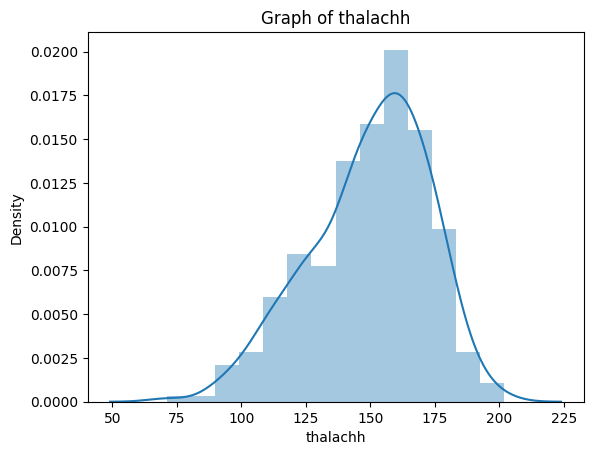

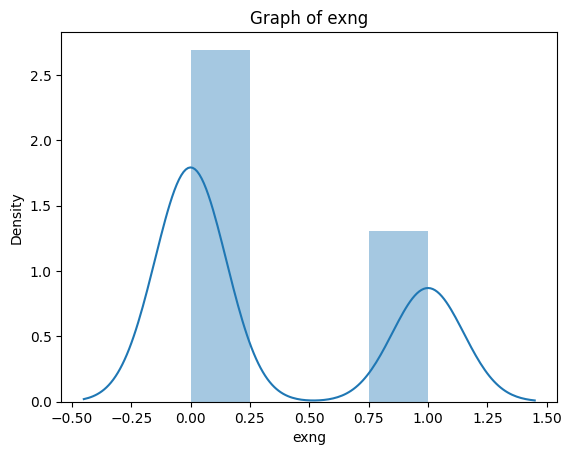

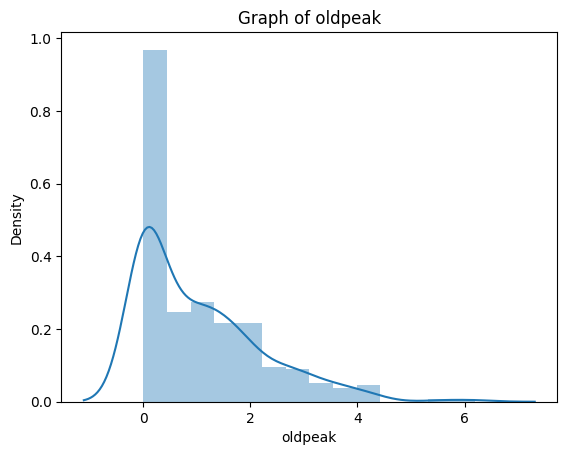

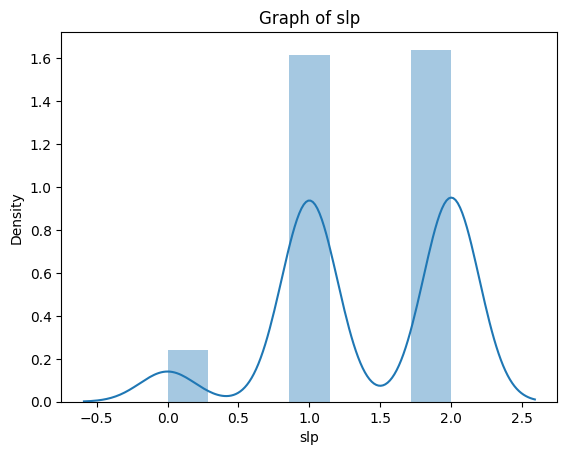

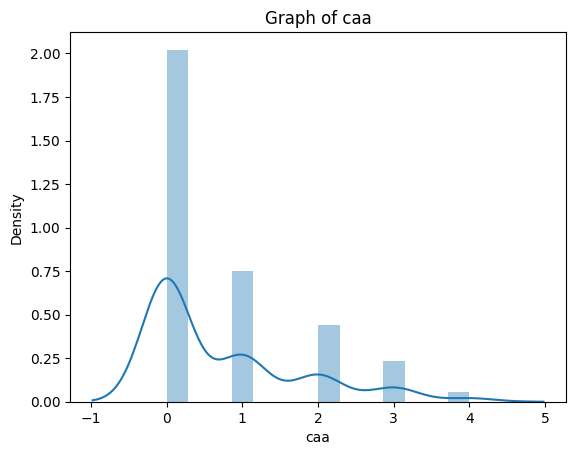

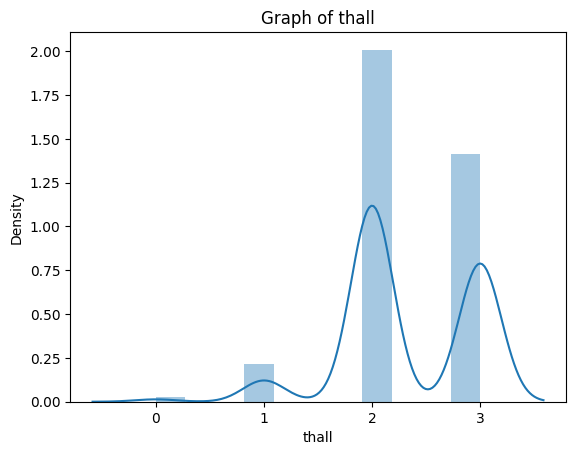

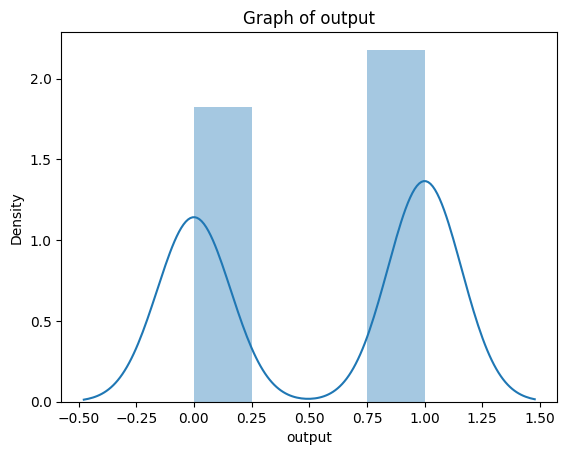

In [20]:
for col in df.columns:
    sns.distplot(df[col])
    plt.title(f"Graph of {col}")
    plt.show()

In [22]:
skewness=df.skew()
print(skewness)

age        -0.202463
sex        -0.791335
cp          0.484732
trtbps      0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalachh   -0.537410
exng        0.742532
oldpeak     1.269720
slp        -0.508316
caa         1.310422
thall      -0.476722
output     -0.179821
dtype: float64


In [23]:
from scipy.stats import boxcox
df['chol'], _ = boxcox(df['chol'] + 1)

In [25]:
df['fbs'], _ = boxcox(df['fbs'] + 1)
df['exng'], _ = boxcox(df['exng'] + 1)
df['caa'], _ = boxcox(df['caa'] + 1)
df['oldpeak'], _ = boxcox(df['oldpeak'] + 1)

In [26]:
skewness=df.skew()
print(skewness)

age        -0.202463
sex        -0.791335
cp          0.484732
trtbps      0.713768
chol       -0.006209
fbs         1.986652
restecg     0.162522
thalachh   -0.537410
exng        0.742532
oldpeak     0.124238
slp        -0.508316
caa         0.426394
thall      -0.476722
output     -0.179821
dtype: float64


In [31]:
X=df.drop('output',axis=1)
y=df['output']

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [40]:
X_train_scale=scale.fit_transform(X_train)

In [41]:
X_test_scale=scale.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [53]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine (Linear Kernel)": SVC(kernel="linear"),
    "Support Vector Machine (RBF Kernel)": SVC(kernel="rbf"),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "AdaBoost Classifier": AdaBoostClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Naive Bayes Classifier": GaussianNB()
}

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [57]:
for model in models.values():
    model.fit(X_train_scale, y_train)
    y_pred = model.predict(X_test_scale)
    print(f"Accuracy of {model.__class__.__name__}: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision of {model.__class__.__name__}: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall of {model.__class__.__name__}: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score of {model.__class__.__name__}: {f1_score(y_test, y_pred):.2f}")
    print("-"*50)

Accuracy of LogisticRegression: 0.87
Precision of LogisticRegression: 0.88
Recall of LogisticRegression: 0.88
F1 Score of LogisticRegression: 0.88
--------------------------------------------------
Accuracy of KNeighborsClassifier: 0.87
Precision of KNeighborsClassifier: 0.90
Recall of KNeighborsClassifier: 0.84
F1 Score of KNeighborsClassifier: 0.87
--------------------------------------------------
Accuracy of RandomForestClassifier: 0.87
Precision of RandomForestClassifier: 0.85
Recall of RandomForestClassifier: 0.91
F1 Score of RandomForestClassifier: 0.88
--------------------------------------------------
Accuracy of SVC: 0.87
Precision of SVC: 0.88
Recall of SVC: 0.88
F1 Score of SVC: 0.88
--------------------------------------------------
Accuracy of SVC: 0.85
Precision of SVC: 0.87
Recall of SVC: 0.84
F1 Score of SVC: 0.86
--------------------------------------------------
Accuracy of GradientBoostingClassifier: 0.77
Precision of GradientBoostingClassifier: 0.80
Recall of Gradi